### 0.데이터 다운로드

In [1]:
!git clone https://github.com/Soyoung-Yoon/data_02

Cloning into 'data_02'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 72 (delta 7), reused 0 (delta 0), pack-reused 47
Unpacking objects: 100% (72/72), 448.80 KiB | 6.50 MiB/s, done.


In [1]:
import scipy
scipy.__version__

'1.10.0'

In [3]:
!pip install scipy==1.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 33.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


### 확률분포 그리기

### 1.이산형 확률분포 
- Probability Mass Function, PMF, 𝐲=𝒇(𝒙)
- 이산 확률 변수에서 특정 값에 대한 확률을 계산하기 위한 함수

#### 1-1.기하 분포

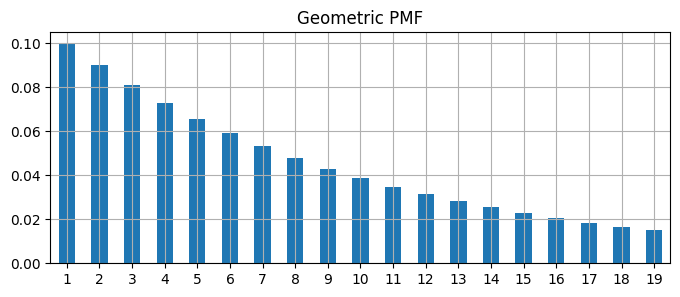

In [3]:
# 확률이 0.1인 기하분포
from scipy.stats import geom
import matplotlib.pyplot as plt  # 시험과 무관
import pandas as pd

sp = 0.1
x = range(1, 20)  # 시도 횟수
y = geom(p=sp).pmf(x)
# 시험과 무관
s = pd.Series(y, index=x)
s.plot(kind='bar', figsize=(8,3), rot=0, grid=True, title='Geometric PMF')
plt.show()

#### 1-2.초기하 분포

[0.0003 0.0036 0.0188 0.0597 0.1268 0.1918 0.2141 0.1803 0.1162 0.0578
 0.0222 0.0066 0.0015 0.0003 0.     0.     0.     0.     0.     0.
 0.    ]


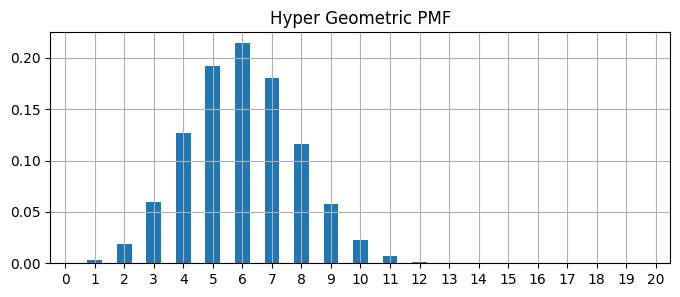

In [23]:
# M : 모집단 개수, n : 성공요소의 수, N : 시행횟수(선택 횟수, 비복원 추출 횟수)
# M, n, N = 100, 30, 20
from scipy.stats import hypergeom
import matplotlib.pyplot as plt   # 시험과 무관
import pandas as pd

a, b, c = 100, 30, 20
x = range(c+1)  # 0 ~ 21
y = hypergeom(M=a, n=b, N=c).pmf(x)  # x는 내가 원하는 것의 개수
s = pd.Series(y, index=x)
print(s.to_numpy().round(4))
s.plot(kind='bar', figsize=(8, 3), grid=True, rot=0, 
       title='Hyper Geometric PMF')
plt.show()

[0.01282051 0.12820513 0.35897436 0.35897436 0.12820513 0.01282051
 0.        ]


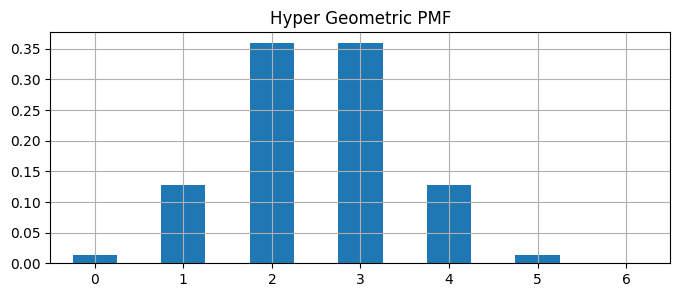

In [25]:
a, b, c = 16, 8, 5
x = range(c+2)  # 0 ~ 12
y = hypergeom(M=a, n=b, N=c).pmf(x)  # x는 내가 원하는 것의 개수
s = pd.Series(y, index=x)
print(s.to_numpy())
s.plot(kind='bar', figsize=(8, 3), grid=True, rot=0, 
       title='Hyper Geometric PMF')
plt.show()

#### 1-3.포아송 분포

In [ ]:
# mu = 단위/공간당 평균 발생 횟수
# 평균 2회 발생 횟수를 갖는 포아송 분포


### 2.연속형 확률분포 객체 생성

PDF(Probability Density Function) : 확률 밀도 함수
- 연속적인 변수에 의한 확률 분포 함수
- 항상 양의 값을 가져야 하며, 모든 범위의 PDF를 합한 값은 1임
- f(x) >= 0
- 분포내 특정 값에서의 확률은 0, P(X=a) = 0, 정의된 범위 내에서의 확률은 범위내의 pdf 영역 넓이(적분값)가 됨

#### 2-1. 표준정규분포

In [ ]:
# 표준정규분포 객체 생성 및 그래프 그리기


In [ ]:
# 표준정규분포 객체 생성 및 그래프 그리기 - loc, scale 대응


#### 2-2. Student t 분포

In [ ]:
from scipy.stats import t
help(t)

In [ ]:
# Student t 분포 객체 생성 및 그래프 그리기
from scipy.stats import t
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# 표준정규분포와 스튜던트 t 분표 비교
from scipy.stats import norm, t
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### 2-3.지수분포


In [ ]:
# Exponential(지수)분포 객체 생성 및 그래프 그리기


#### 2-4.감마분포

In [ ]:
# Gamma(감마)분포 객체 생성 및 그래프 그리기


### 3.이산형 확률분포 문제

CDF(Cumulative Distribution Function) : 누적 분포 함수
- 어떤 확률 분포에 대해 확률 변수가 특정 값보다 작거나 같은 확률
- f(x) = P(X <= x)
- CDF를 미분하면 PDF, PDF를 적분하면 CDF가 됨

### 3-1.기하분포 활용문제


#### 3-1a.이하일 확률
- geom(p).cdf(x)
- A씨가 계란후라이를 만들 때 노른자를 깨지 않을 확률이 0.2라고 한다. A씨가 적어도 5번 이내에 노른자를 깨지 않을 확률을 구하시오.

In [5]:
from scipy.stats import geom
#pmf(1) + pmf(2) + ... + pmg(5)
result = round(geom(p=0.2).cdf(5),4)
print(result)

0.6723


In [7]:
rv = geom(p=0.2)
result = rv.pmf(1) + rv.pmf(2) + rv.pmf(3) + rv.pmf(4) + rv.pmf(5)
result = round(result, 4)
print(result)

0.6723


In [9]:
rv = geom(p=0.2)
x = range(1, 6)
result = round(rv.pmf(x).sum(), 4)
# result = round(result, 4)
print(result)

0.6723


#### 3-1b.이상일 확률
- 1 - geom(p).cdf(x)
- 빅데이터분석기사 실기 합격률은 35%라고 한다. 이 시험에 2번 이상 응시해야 자격증 취득에 성공할 확률을 구하시오.

In [11]:
from scipy.stats import geom
result = round(1 - geom(p=0.35).cdf(1), 2)
print(result)

0.65


#### 3-1c. 특정 횟수일 확률
- geom(p).cdf(x) - geom(p).cdf(x-1)
- A 야구선수의 홈런 칠 확률이 5%일 때, 이 선수가 4번째 타석에서 홈런 칠 확률을 구하시오.

In [12]:
from scipy.stats import geom

c = 0.05
result = round(geom(p=c).pmf(4), 4)
print(result)

0.0429


In [17]:
from scipy.stats import geom

c = 0.05
rv = geom(p=c)
result = round(rv.cdf(4) - rv.cdf(3), 4)
print(result)

0.0429


###3-2.초기하분포 활용문제

In [39]:
# 파란공, 빨간공 각 8개씩, 5개의 공을 비복원으로 뽑고
# 뽑은 공 중에서 3개 파란공, 2개 빨간 공일 화률
from scipy.stats import hypergeom
a, b, c = 16, 8, 5
rv = hypergeom(M=a, n=b, N=c)
round(rv.pmf(3), 5), round(rv.pmf(2), 5)

(0.35897, 0.35897)

#### 3-2a.이하일 확률
- hypergeom(M, n, N).cdf(x)
- 어느 회사에서 랜덤박스 선물셋트를 50개 준비했다. 선물셋트에 향수가 포함된 것이 8개 라고 한다. 비복원추출로 선물셋트 4개를 뽑았을 때, 향수가 포함된 선물이 2개 이하로 나올 확률을 구하시오.

In [28]:
from scipy.stats import hypergeom
a, b, c = 50, 8, 4
result = round(hypergeom(M=a, n=b, N=c).cdf(2), 4)  # x=0, 1, 2
print(result)

0.9895


In [36]:
from scipy.stats import hypergeom
a, b, c = 50, 8, 4
rv = hypergeom(M=a, n=b, N=c)
result = round(rv.pmf(0) + rv.pmf(1) + rv.pmf(2), 4)  # x=0, 1, 2
print(result)

0.9895


In [37]:
from scipy.stats import hypergeom
a, b, c = 50, 8, 4
rv = hypergeom(M=a, n=b, N=c)
x = range(3)
result = round(rv.pmf(x).sum(), 4)  # x=0, 1, 2
print(result)

0.9895


#### 3-2b.이상일 확률
- 1 - hypergeom(M, n, N).cdf(x)
- 짱구엄마가 사과 20개와 배 8를 사왔다. 비복원추출로 사과와 배 5개를 집었을 때 배가 2개 이상일 확률을 구하시오.

In [30]:
from scipy.stats import hypergeom
a, b, c = 28, 8, 5
result = round(1 - hypergeom(M=a, n=b, N=c).cdf(1) , 4)
print(result)

0.4479


#### 3-3c.특정 횟수일 확률
- hypergeom(M, n, N).pmf(x)
- hypergeom(M, n, N).cdf(x) - hypergeom(M, n, N).cdf(x-1)
- 뽑기 기계에 꽝이 아닌 것이 10개, 꽝이 30개 포함되어 있다고 한다. 비복원추출로 4개를 뽑았을 때 이중 꽝이 아닌 것이 3개 나올 확률을 구하시오.

In [31]:
from scipy.stats import hypergeom
a, b, c = 40, 10, 4
result = round(hypergeom(M=a, n=b, N=c).pmf(3), 4)   
print(result)

0.0394


In [33]:
from scipy.stats import hypergeom
a, b, c = 40, 10, 4
rv = hypergeom(M=a, n=b, N=c)
result = round(rv.cdf(3) - rv.cdf(2), 4)
print(result)

0.0394


### 3-3.포아송분포 활용문제

#### 3-3a.이하일 확률
- poisson(mu).cdf(x)
- 어느 AS센터에 1시간당 평균 180건의 전화가 온다. 이때 1분 동안 걸려오는 전화 요청이 4건 이하일 확률을 구하시오.

In [ ]:
help(poisson)

####3-3b.이상일 확률
- 1- poisson(mu).cdf(x)
- 어느 가게에 1시간당 평균 8명의 손님이 온다. 이때, 1시간 동안 손님이 6명 이상 올 확률을 구하시오.

#### 3-3c.특정 개수일 확률
- poisson(mu).cdf(x) - poisson(mu).cdf(x-1)
- 출판사에서 원고 검수를 6 페이지 하였는데 오타가 총 12개 발견되었다고 한다. 이 원고에서 어떤 한 페이지를 검수하였을 때, 오타가 2개 나올 확률을 구하시오.


### 4.연속형 확률분포 문제

### 4-1.정규분포 활용문제
- loc : 평균, scale : 표준편차
- x (확률변수) : 평균


#### 4-1a.이하일 확률
- norm(loc=평균, scale=표준편차).cdf(x) 사용
- Z회사의 USB 수명을 조사하였더니 USB의 평균 수명은 5000시간이고, 표준편차가 100시간인 정규분포를 따른다고 한다. USB의 수명이 4800시간 이하일 확률을 구하시오
 


In [ ]:
from scipy.stats import norm


#### 4-1b.이상일 확률
- 1 - norm(loc=평균, scale=표준편차).cdf(x) 사용
- A씨는 냉장고의 수명을 조사하였다. 냉장고의 평균 수명은 10년이고, 표준편차가 2년인 정규분포를 따른다고 한다.  냉장고의 수명이 14년 이상일 확률을 구하시오.


In [ ]:
from scipy.stats import norm


#### 4-1c.특정 구간일 확률
- norm(loc=평균, scale=표준편차).cdf(큰값) - norm(loc=평균, scale=표준편차).cdf(작은값)
- X회사에서 생산되는 계란은 평균 무게가 80g 이고 분산이 100g인 정규분포를 따른다고 한다. 계란의 평균 무게가 55g ~ 90g일 확률을 구하시오.


In [ ]:
from scipy.stats import norm


#### 4-1d.정규분포 신뢰구간 
- (통계량 – 오차한계) ~ (통계량 + 오차한계)
- 오차한계 = 표본오차, 임계값 * 𝜎/√𝑛 
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
- norm.interval(confidence, loc=mu, scale=stderr)
- norm.ppf((1+confidence)/2, loc=mu, scale=stderr)
- scipy.stats.sem(data)로 stderr 구하기 가능


어느 배 농장에서 수확한 배의 평균 무게(𝝁)에 대해 알아보기 위해 36개의 배를 추출하여 무게를측정하였더니 평균이 602g, 표준편차가 30g이 나왔다고 한다. 이때 배의 평균 무게 (𝝁) 의 95% 신뢰구간을 구하여라


In [ ]:
from scipy.stats import norm


In [ ]:
from scipy.stats import norm
# ppf 사용


In [ ]:
confidence = 0.95
alpha1 = (1 - confidence) / 2
alpha2 = (1 + confidence) / 2  # confidence+alpha
print(alpha1, alpha2)

### 4-2.t분포 활용문제

#### 4-2a.이하일 확률
상수원 수질을 나타내는 수치 중 하나로 ‘단위부피당 평균 세균수’가 있으며, A 호수의 10곳의 수질을 조사한 단위 부피당 세균수가 a.csv 파일에 기록되어 있다. 이 자료로부터 호수의 단위부피당 평균 세균수(𝝁)가 200 이하일 확률을 구하라.


In [ ]:
import pandas as pd
from scipy.stats import t

# data_02/a.csv


#### 4-2b.t분포 신뢰구간
모평균이 𝝁, 표준편차가 𝝈=8 인 정규분포를 따르는 모집단이 있다.  이 모집단에서 크기가 25인 표본을 추출하여 구한 평균이 42.7이었다. 이때, 모평균 𝝁 이 위치할 95% 신뢰도의 
신뢰구간을 구하라.

In [ ]:
from scipy.stats import t
# interval


In [ ]:
from scipy.stats import t
# ppf


#### 4-2c.t분포 신뢰구간
우주선 제작에 사용되는 합금의 평균 장력 𝝁 를 추정하고자 한다. 15개의 새 합금조각으로부터 장력을 측정한 결과 
평균이 39.3, 표준편차가 2.6으로 나타났다. 합금의 평균 장력 𝝁에 대한 90% 신뢰구간을 구하라. 


In [ ]:
from scipy.stats import t
# interval


In [ ]:
from scipy.stats import t
# ppf


#### 4-2d.20대 수면시간 - t분포 사용
- interval(confidence, df, loc=0, scale=1)
- 20대 수면 평균 시간(𝝁)에 대해 추정하고자 한다.  sleepage.csv에 'stime20s' column을 사용하여, 20대 수면 평균 시간에 대해 99% 신뢰구간을 구하라.

In [ ]:
import pandas as pd
from scipy.stats import t, sem


ppf를 사용하는 방법

In [ ]:
import pandas as pd
from scipy.stats import t, sem


### 4-3.지수분포 활용문제
- 단위 시간당 발생하는 평균 사건의 수 : λ 
- 발생하는 사건들 사이의 시간 : x (확률변수)


#### 4-3a.이하일 확률
- expon(scale=1/λ).cdf(x) 사용
- 전자 제품의 5년간 고장횟수가 평균 1회이고, 지수분포를 따른다. 1년 안에 고장 날 확률을 구하시오.


In [ ]:
from scipy.stats import expon



#### 4-3b.이상일 확률
- 1 - expon(scale=1/λ).cdf(x) 사용
- 어느 회사에서 생산하는 냉장고 평균수명은 10년이고, 지수분포를 따른다. 이 냉장고의 수명이 10년 이상 지속될 확률을 구하시오.

In [ ]:
from scipy.stats import expon



#### 4-3c.특정 구간일 확률
- expon(scale=1/λ).cdf(큰값) - expon(scale=1/λ).cdf(작은값)
- 어느 커피샵에서 커피를 구입하기 위해 대기하는 시간이 평균 7분이고, 지수분포를 따른다. 
이 커피샵에 갔을 때 대기하는 시간이 4분에서 10분일 확률을 구하시오.

In [ ]:
from scipy.stats import expon



### 4-4.감마분포 활용문제
- 확률변수 x = 𝜶 개의 사건이 발생할 때까지 걸리는 시간 (어떤 사건이 여러 번 발생하는 데 걸리는 시간)
- n: 사건발생건수, λ : 단위시간/공간 당 발생하는 사건 평균 건 수

#### 4-4a.이하일 확률
- gamma(a=n, scale=1/λ)
- A씨는 한 시간에 평균 6개의 택배를 배송한다. 30개의 택배를 배송할 때 걸리는 시간이 5시간 이하로 소요될 확률을 구하시오. 

In [ ]:
from scipy.stats import gamma


#### 4-4b.이상일 확률
- 1 - gamma(a=n, scale=1/λ).cdf(x)
- B은행은 한 명의 고객응대에 평균 5분이 소요된다.  이 은행에서 30명의 고객응대에 2시간 이상으로 소요될 확률을 구하시오. 

In [ ]:
from scipy.stats import gamma



#### 4-4c.특정 구간일 확률
- gamma(a=n, scale=1/λ).cdf(큰값) - gamma(a=n, 1/λ).cdf(작은값)
- C씨는 비즈 목걸이를 만드는데 평균 30분 걸린다.  5개 비즈 목걸이를 만들 때까지 걸리는 시간이 2시간에서 4시간 사이 소요될 확률을 구하시오

In [ ]:
from scipy.stats import gamma



In [ ]:
####  카이제곱, F분포 등을 추가해 보려고 합니다. (우선 모수, 비모수 검정을 녹화합니다)